In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
from scipy.fft import fft
import IPython.display as ipd
from scipy.io.wavfile import read

In [16]:
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  plt.figure(0, figsize=(10, 4))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  ipd.display(ipd.Audio(data=sound_array, rate=sampling_rate))
  plt.show()

def display_spectrum(sound_array, sampling_rate=44100):
  """ Display magnitude spectrum of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  window = get_window('hann', sound_array.size)
  spectrum = fft(window*sound_array)
  magnitude_spectrum= 20*np.log10(abs(spectrum[:spectrum.size//2]))

  plt.figure(0, figsize=(10, 5))
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/spectrum.size)
  plt.plot(frequency_indexes, magnitude_spectrum)
  plt.xlabel('frequency (Hz)')
  plt.ylabel('amplitude (dB)')
  plt.show()

def display_spectrogram(sound_array, hop_size=256, fft_size=512, sampling_rate=44100):
  """ Display magnitude spectrogram of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      hop_size (int): window hop size
      fft_size (int): Spectrogram fft size
      sampling_rate (int): Sampling rate of sound
  """
  sample_index = 0
  window = get_window('hann', fft_size)
  magnitude_spectrogram = []
  while sample_index < sound_array.size-fft_size:
    spectrum = fft(window*sound_array[sample_index:sample_index+fft_size])
    magnitude_spectrum= 20*np.log10(abs(spectrum[:spectrum.size//2]))
    magnitude_spectrogram.append(magnitude_spectrum)
    sample_index += hop_size

  plt.figure(figsize=(10, 5))
  time_indexes = np.arange(0, sample_index/sampling_rate, hop_size/sampling_rate)
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/fft_size)
  plt.pcolormesh(time_indexes, frequency_indexes, np.transpose(magnitude_spectrogram), shading='nearest', cmap='inferno')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('time (seconds)')
  plt.ylabel('frequency (Hz)')
  plt.show()

In [17]:
def calculate_entropy(probs):
    """
    Args:
        probs (np.array): Array of probs. for each symbol in the source
    Returns:
        H (float): entropy value
    """
    H = 0
    for p in probs:
      if(p > 0):
        H -= p * np.log2(p)
      elif(p < 0):
        return np.nan
    return H

def get_prob_per_symbol(y):
    """ Get symbol occurrence probability
    Args:
        x (np.array): Input signal
    Returns:
        (np.array, np.array): (sorted symbols, corresponding probabilities)
    """
    symbols, count = np.unique(y, return_counts=True)
    probs = count / sum(count)
    return symbols, probs

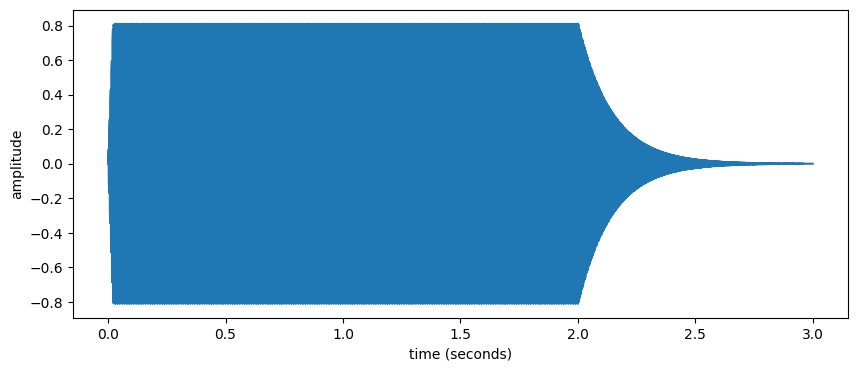

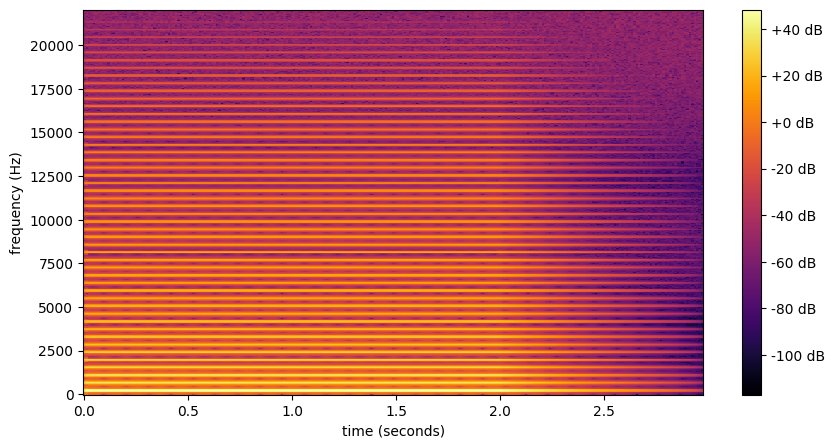

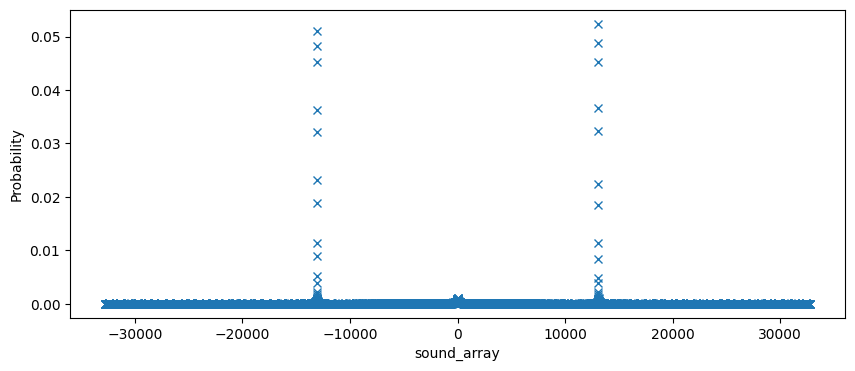

Entropy: 8.724903416132895


In [21]:
#sound_array, sampling_rate = read_sound('../sounds/721313-hangpan.wav')
sound_array, sampling_rate = read_sound('../sounds/synthetic.wav')
#sound_array, sampling_rate = read_sound('../sounds/406609-tuba.wav')
#sound_array, sampling_rate = read_sound('../sounds/750340-background-music.wav')
#sound_array, sampling_rate = read_sound('../sounds/white-noise.wav')

display_sound(sound_array, sampling_rate)
display_spectrogram(sound_array, 512, 1024, sampling_rate)

# Quantize by rounding
nbits = 16
x_scaled = sound_array * 2**nbits
x_quantized = np.int16(np.round(x_scaled))

symbols, probs = get_prob_per_symbol(x_quantized)


plt.figure(0, figsize=(10, 4))
plt.plot(symbols, probs, 'x')
plt.ylabel("Probability")
plt.show()

h = calculate_entropy(probs)
print("Entropy:", h)